In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
config = {
    "input_file": "data/EMD_Reconstructed(i-80 0400-0415).csv",
    "ground_truth_file": "data/true_camera6-0400-0415.csv",
    "input_position": "Local_Y",
    "input_speed": "v_Vel",
    "input_acc": "v_Acc"
}

In [95]:
df_input_data = pd.read_csv(config['input_file'])
df_ground_truth = pd.read_csv(config['ground_truth_file'])

In [96]:
df = df_input_data.merge(df_ground_truth, how = "inner", on = ["Vehicle_ID", "Frame_ID"], suffixes=["_input","_groud_truth"])
#df.loc[:, df.columns.str.contains("Ac")]
#df.loc[:, df.columns.str.contains("Local")].sample(10)
#df[(df.Local_Y_raw - df.Local_Y_new) > 30][["Local_Y_raw", "Local_Y_new"]]

In [97]:
df[config["input_speed"] + "_input"].describe() #get stats for speed and acc

count    165826.000000
mean         25.835880
std          12.844795
min           0.000000
25%          18.184010
50%          24.693887
75%          30.789166
max          87.316996
Name: v_Vel_input, dtype: float64

<AxesSubplot:>

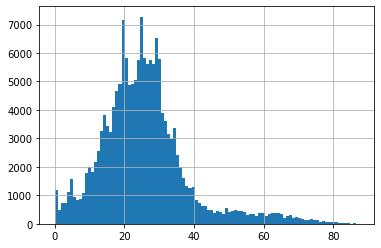

In [98]:
df[config["input_speed"] + "_input"].hist(bins=100)

In [99]:
df[config["input_acc"] + "_input"].describe() #get stats for speed and acc

count    165826.000000
mean         -0.109081
std           2.431230
min         -11.200000
25%          -1.321506
50%          -0.020640
75%           1.099787
max          11.200000
Name: v_Acc_input, dtype: float64

<AxesSubplot:>

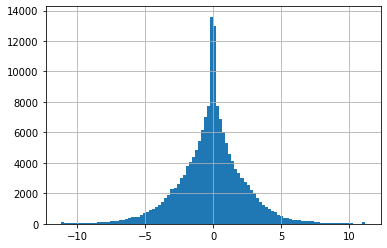

In [100]:
df[config["input_acc"] + "_input"].clip(-11.2, 11.2).hist(bins=100)

In [101]:
class Comparison():
    
    def __init__(self, input_data, true_data, cfg):
        self.config = cfg
        self.input_data = input_data
        self.true_data = true_data
        #raw - input, new - groud_truth
        self.df = self.input_data.merge(self.true_data, how = "inner", on = ["Vehicle_ID", "Frame_ID"], suffixes=["_input", "_groud_truth"])
        
    def MSE_speed(self):
        name = self.config['input_speed']
        self.df["Vel_diff"] = self.df[name + "_input"] - self.df[name + "_groud_truth"]
        return np.sum(self.df["Vel_diff"] ** 2) / self.df.shape[0]
    
    def MSE_acce(self):
        name = self.config['input_acc']
        self.df["Acc_diff"] = self.df[name + "_input"] - self.df[name + "_groud_truth"]
        return np.sum(self.df["Acc_diff"] ** 2)/self.df.shape[0]
    
    def MSE_loc(self):
        name = self.config['input_position']
        self.df["LocY_diff"] = self.df[name + "_input"] - self.df[name + "_groud_truth"]
        return np.sum(self.df["LocY_diff"] ** 2)/self.df.shape[0]
    
        

In [102]:
c = Comparison(df_input_data, df_ground_truth, config)

In [103]:
c.MSE_acce()

4.1558570700974835

In [104]:
c.MSE_speed()

4.078715309585185

In [105]:
c.MSE_loc()

157.89027034208095

In [106]:
#np.sum((df["v_Vel_input"] - df["v_Vel_groud_truth"]) **2)/df.shape[0]
#np.sum((df["v_Acc_input"] - df["v_Acc_groud_truth"]) **2)/df.shape[0]
#df["v_Vel_input"] - df["v_Vel_groud_truth"]

In [107]:
df["Vel_diff"] = df["v_Vel_input"] - df["v_Vel_groud_truth"]
df.groupby("Lane_ID_groud_truth").mean()["Vel_diff"]

Lane_ID_groud_truth
1.0    1.088493
2.0    0.308409
3.0    0.374690
4.0    0.171502
5.0    0.154193
6.0    0.221720
9.0    0.772118
Name: Vel_diff, dtype: float64

In [108]:
# ax = sns.kdeplot(data = df, x = df["Vel_diff"], hue = "Lane_ID_groud_truth")
# ax.set_xlim((-6,6))

In [109]:
df[df["Lane_ID_groud_truth"] != df["Lane_ID_input"]][["Lane_ID_groud_truth", "Lane_ID_input"]]

,Lane_ID_groud_truth,Lane_ID_input
592,5.0,4
593,5.0,4
594,5.0,4
595,5.0,4
596,5.0,4
...,...,...
164353,9.0,6
164354,9.0,6
164355,9.0,6
165232,3.0,2
